In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pydub.utils import mediainfo
import eyed3
import plotly.express as px
from tqdm import tqdm
import json

In [2]:
ROOT = "../../dataset/train_mp3s"
df = pd.read_csv("../../dataset/train.csv")

In [3]:
df["seqlen"] = df.sentence.apply(len)

In [8]:
df["seqlen"].max()

233

In [15]:
unique_chars = {}
for sentences in tqdm(df.sentence[df.split=="train"]):
    for c in sentences:
        if c not in unique_chars:
            unique_chars[c] = 0
        unique_chars[c] +=1
        

100%|██████████| 934048/934048 [00:11<00:00, 79279.84it/s]


In [24]:
c=0
ctoi = {}
for k in unique_chars:
    if unique_chars[k]>50:
        ctoi[k] = c
        c+=1
json.dump(ctoi,open("../constants/character_to_idx.json","w"))

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Length of audio: 7.848 seconds
Sample rate (Frequency): 32000 Hz
Title: None
Artist: None
Album: None
Album Artist: None
Genre: None
Track Number: CountAndTotalTuple(count=None, total=None)


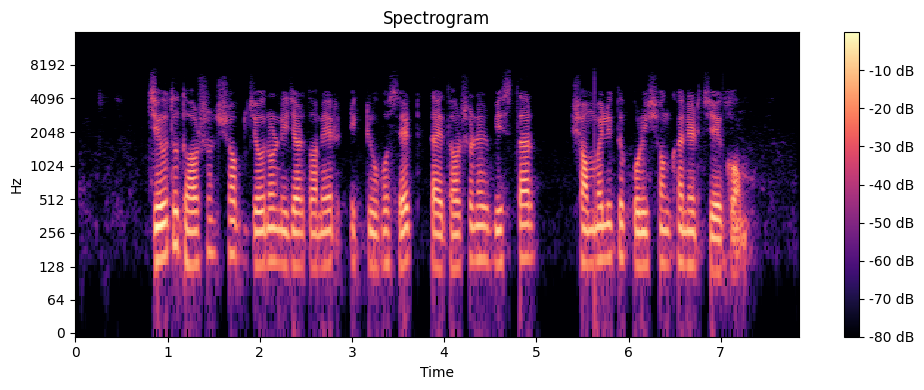

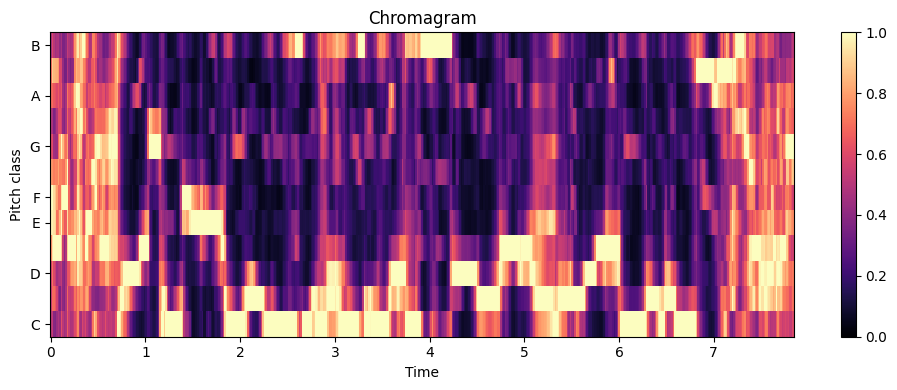

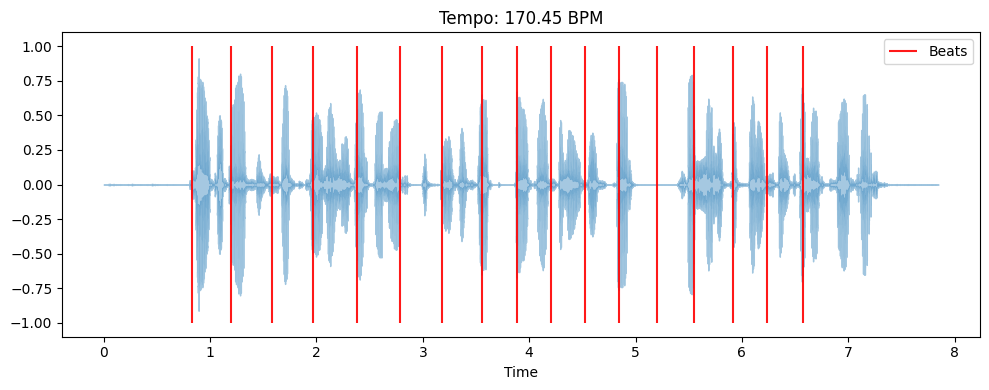

In [16]:
# Load the mp3 file
file_path = os.path.join(ROOT,df.id.sample(2).iloc[0]+".mp3")
y, sr = librosa.load(file_path, sr=None)

# Print Length of the audio
duration = librosa.get_duration(y=y, sr=sr)
print(f"Length of audio: {duration} seconds")

# Print Frequency (Sample rate)
print(f"Sample rate (Frequency): {sr} Hz")

# Print Metadata
audiofile = eyed3.load(file_path)
print("Title:", audiofile.tag.title)
print("Artist:", audiofile.tag.artist)
print("Album:", audiofile.tag.album)
print("Album Artist:", audiofile.tag.album_artist)
print("Genre:", audiofile.tag.genre)
print("Track Number:", audiofile.tag.track_num)

import librosa.display

# 2. Spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

# 3. Chromagram
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()
plt.show()

# 4. Tempo and Beat Visualization
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.vlines(beat_times, -1, 1, color='r', alpha=0.9, label='Beats')
plt.title('Tempo: {:.2f} BPM'.format(tempo))
plt.legend()
plt.tight_layout()
plt.show()